<a href="https://colab.research.google.com/github/kthuang20/ds4bio_project/blob/main/DS4BIO_Project_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Research paper

Link to the Paper: [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8762060/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8762060/)

**Goal of research paper:** The research question they wanted to answer was what are the potential key genes associated with tumor progression, tumor immunity and therapeutic efficacy? By calculating and comparing the gene expression levels of potential key genes related to breast cancer in normal and triple-negative breast cancer tissues, they can identify which genes are signficantly upregulated or downregulated. This would then indicate that these genes could be key in the progressing breast cancer tumor and therefore be novel molecular therapeutic targets for treating triple negative breast cancer.

# 2A. Data provided in the paper

**Observations: (columns)** The dataset includes 60 total tissue samples (observations). This was done by removing a pair of breast tissue from each of the 30 triple-negative breast cancer patients, one at sample with breast cancer and a normal tissue sample surrounding the breast cancer tissue from the same excision. Of the 30 pairs of samples, 15 came from patients with with lymph node metastasis and 15 came from patients without lymph node metastasis.

**Features (rows):** There are 20,246 features, each representing the mRNA reads from RNA sequencings of each key gene in the development of breast cancer for each breast tissue sample. This tells us the amount of product that was produced for each protein.

**Metadata:** The paper includes another table (**Table 1**) that describes the clinical characteristics (features) of each of the triple-negative breast cancer patients (observations) such as the size of the tumor and whether or not they had lymph node metastasis.

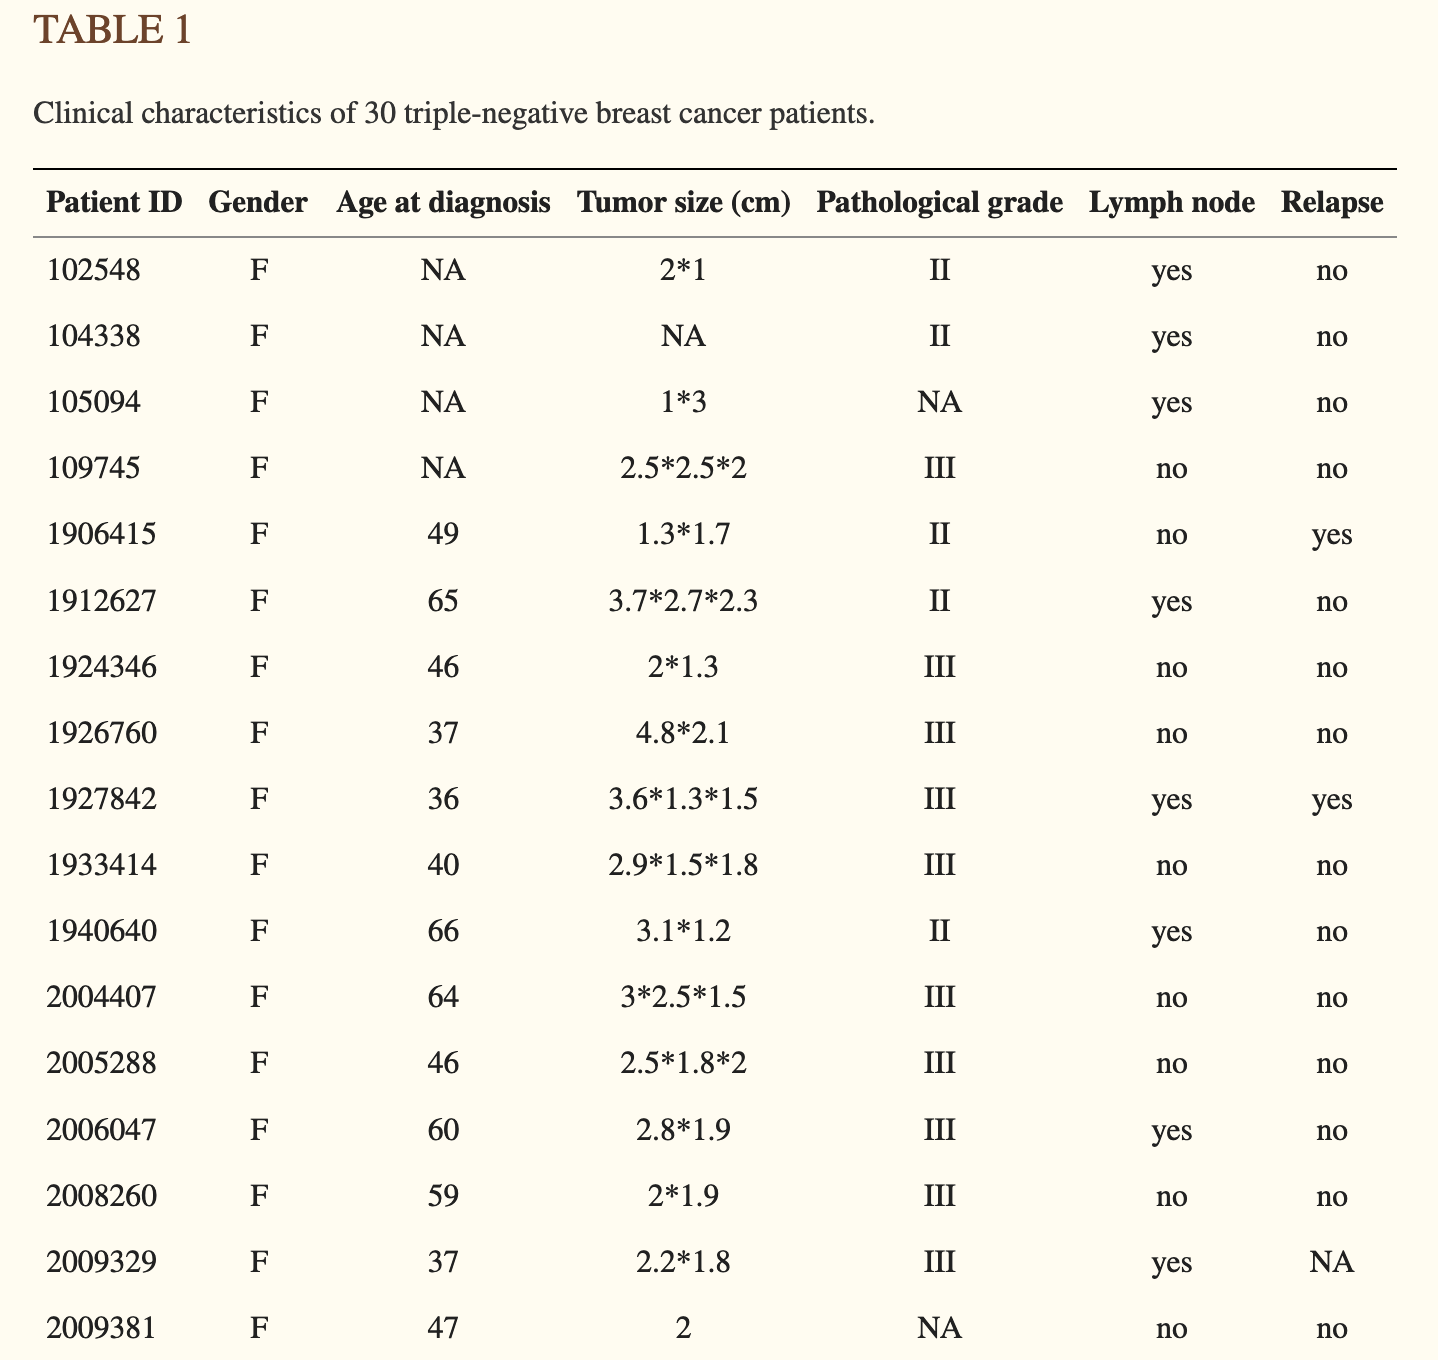

***Another research question:*** Another research question you could ask is of the top 20 key genes for the progression of breast cancer, which genes are significantly upregulated for patients lymph node metastasis? You could test this by comparing the average gene expression levels for breast cancer tissue samples with lymph node metastasis to the normal samples and identifying the ones that are signficantly different from each other.


# 2B. Visualizations and Data Summaries

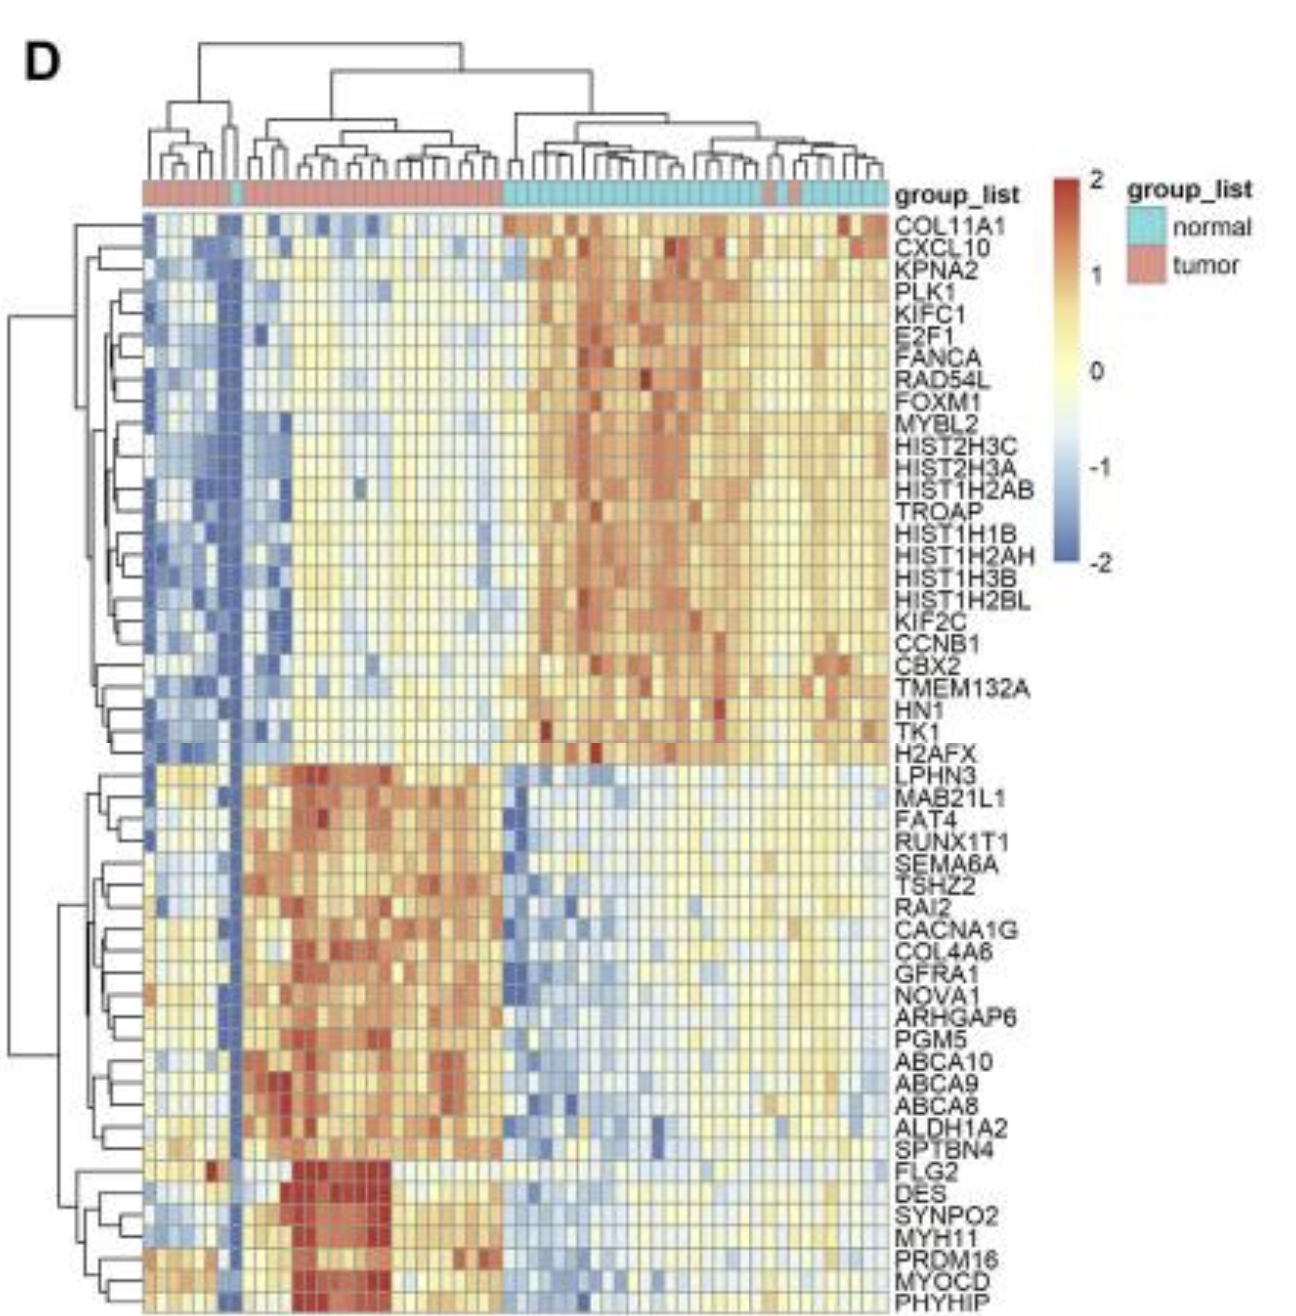

Each of the columns in the heatmap represents each of the observations, the breast tissue samples. The row next to the group list shows what type of sample it is where red boxes represents breast cancer tumor samples and blue boxes represents the normal breast tissue samples. Each of the rows corresponds to a gene. Each individual point represents the expression level for that gene in a particular sample. High expression levels are indicated by warmer colors (closer to red) and low expression levels are indicated with cooler colors (closer to blue). The intensity of the color represents the magnitude (how high/low of a expression level).

The authors chose to include this figure because you can visually see a distinct gene expression patterns between the normal and cancerous breast tissues. For instance, majority of the cancerous breast tissues have a much higher levels for genes at and below LPHN3 on the table compared to the normal breast tissue samples. Therefore, this could suggest that these genes could play a role in the progression of triple breast cancer.

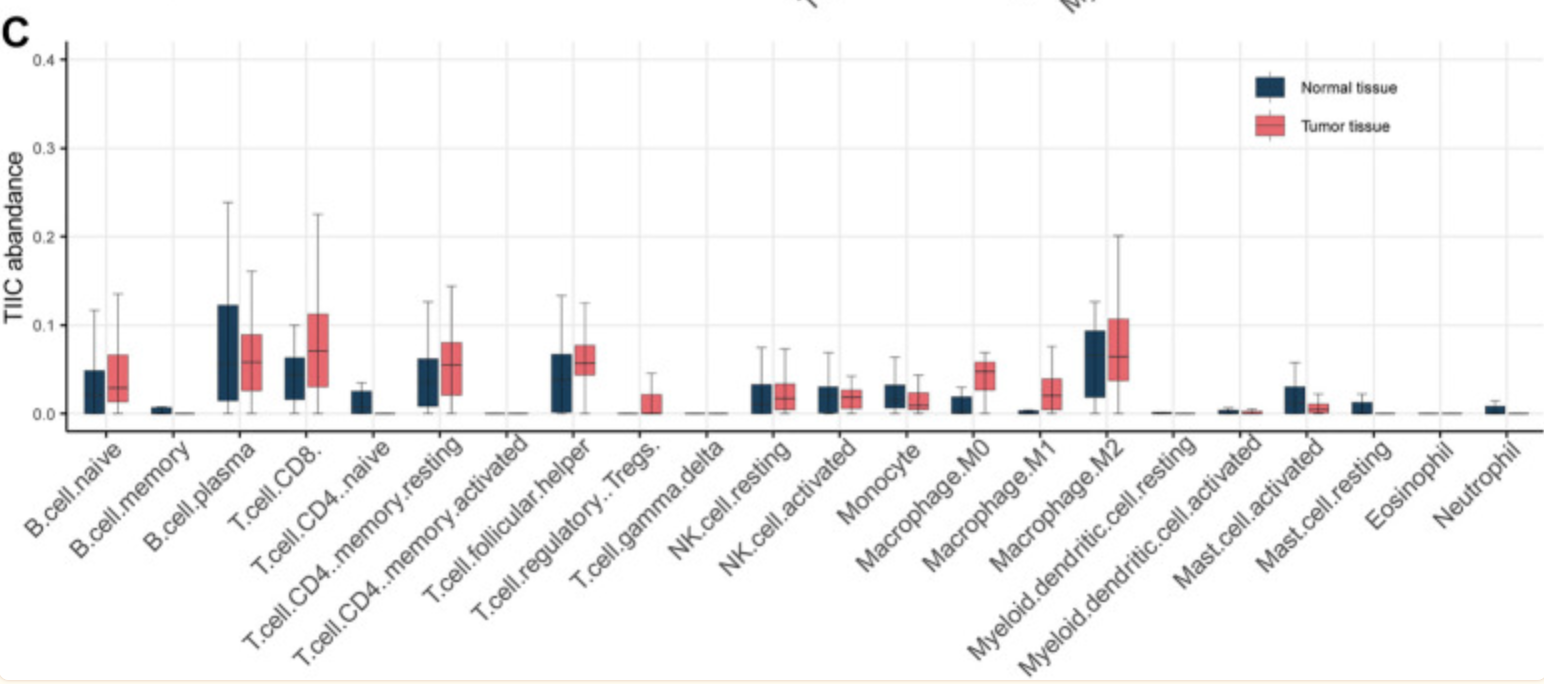

The researchers also wanted to understand how the tumor microenvironment affects triple-negative breast cancer. To do this, they first estimated the number tumor-infiltrating immune cells using a website tool called TIMER 2.0. This tool uses multiple computational models based on deconvolution of the gene expression profile to characterize immune cell composition. Therefore, the data would include the number of immune cells for various types of immune cells for each breast tissue sample. They then calculated the abundance of each type of immune cell for each sample. Afterwards, they compared the box plots of the abundances of each immune cell type in normal and cancerous breast tissue samples side by side. The red box plots represent the cancerous breast tissue and the blue box plots represent the normal breast tissue samples.

From this figure, they found that M2 macrophage, B cell plasma and CD8+ T cell were the top 3 types of immune cells that were most abundant in normal breast tissue. In contrast, CD8+ T cell, M2 macrophage and B cell plasma were the top 3 types of immune cells most abundant in cancerous breast tissue. They also saw that there was a greater abundance of CD8+ T cells, M0 macrophages, M1 macrophages, regulatory T cells and follicular helper T cells in cancerous tissue. This suggests that there is a greater immune response in tumors.

CD8+ T cell levels was the most signficantly elevated type of immune cell in cancerous tissue compared to normal tissue, thereby leading the researchers to look at their data to identify what genes that could have significantly caused this increase.

#### *Additional Figure:*

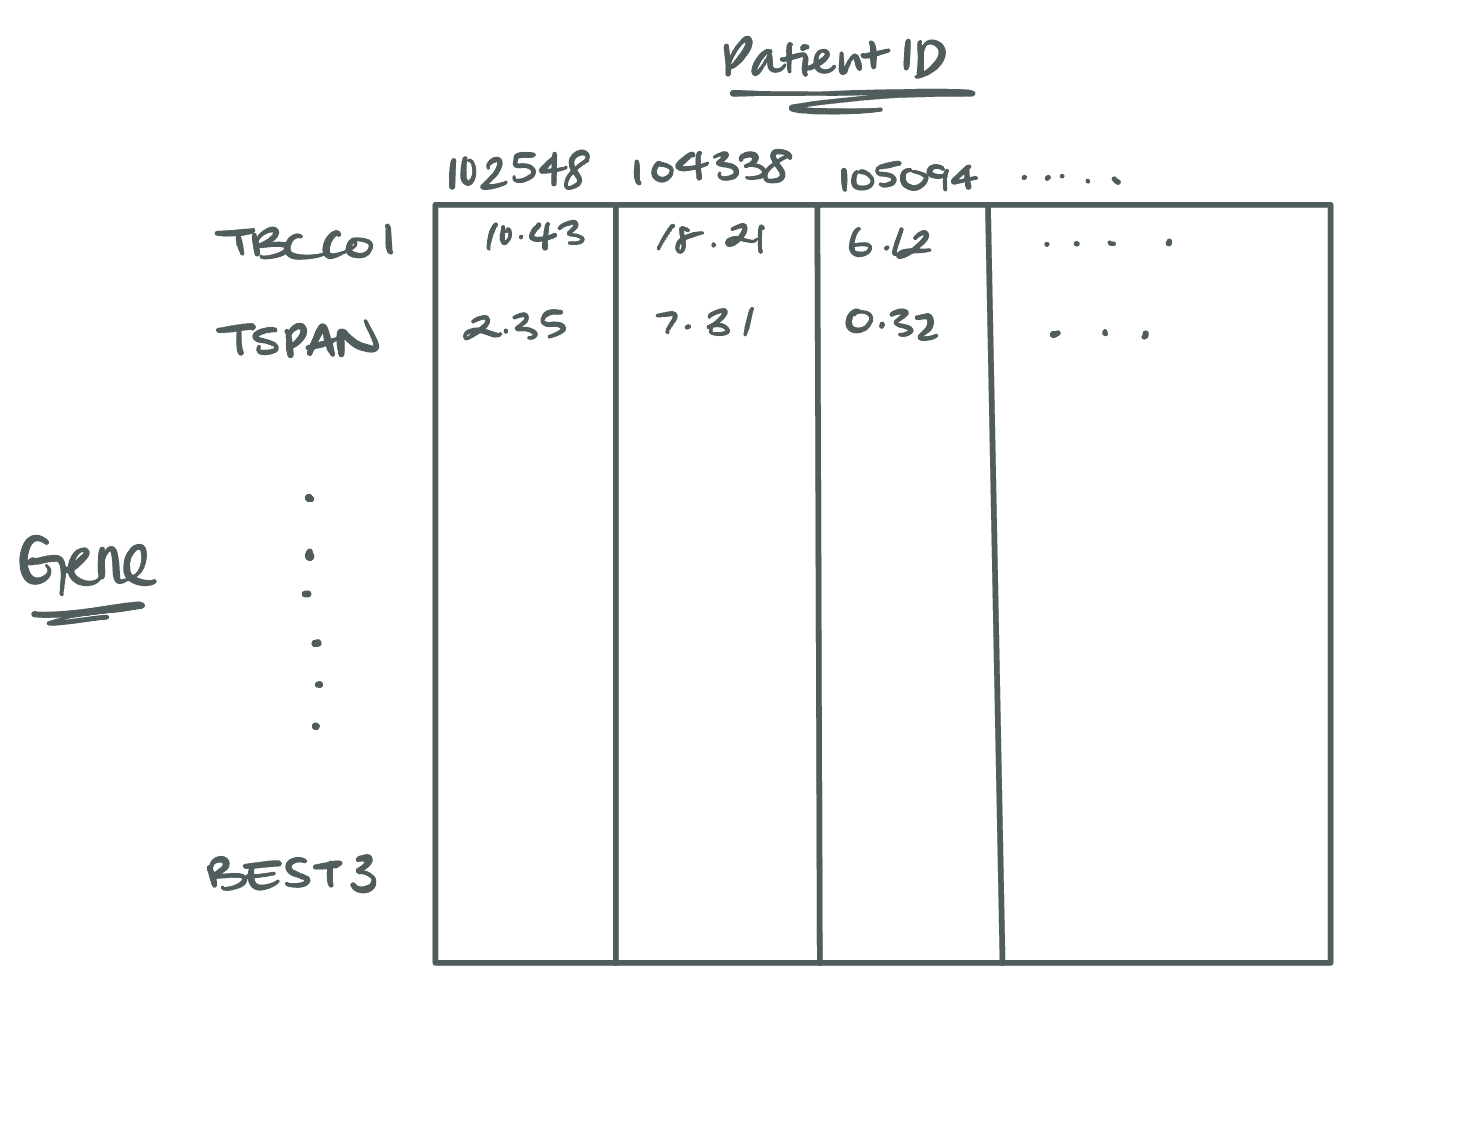

To determine the top 20 genes that are significantly elevated in tissues with lymph node metastasis (research question from section 1), you could first create a dataframe (20,246 rows x 30 columns) the differences in expression levels for each gene between the normal and cancerous tissue samples from the same patient (see above). You could then split this dataframe into series, one for each patient. For each patient, you could then order differences from highest to lowest value. Then, by comparing across all patients, you could select the first 20 genes that had the greatest difference in all patients.

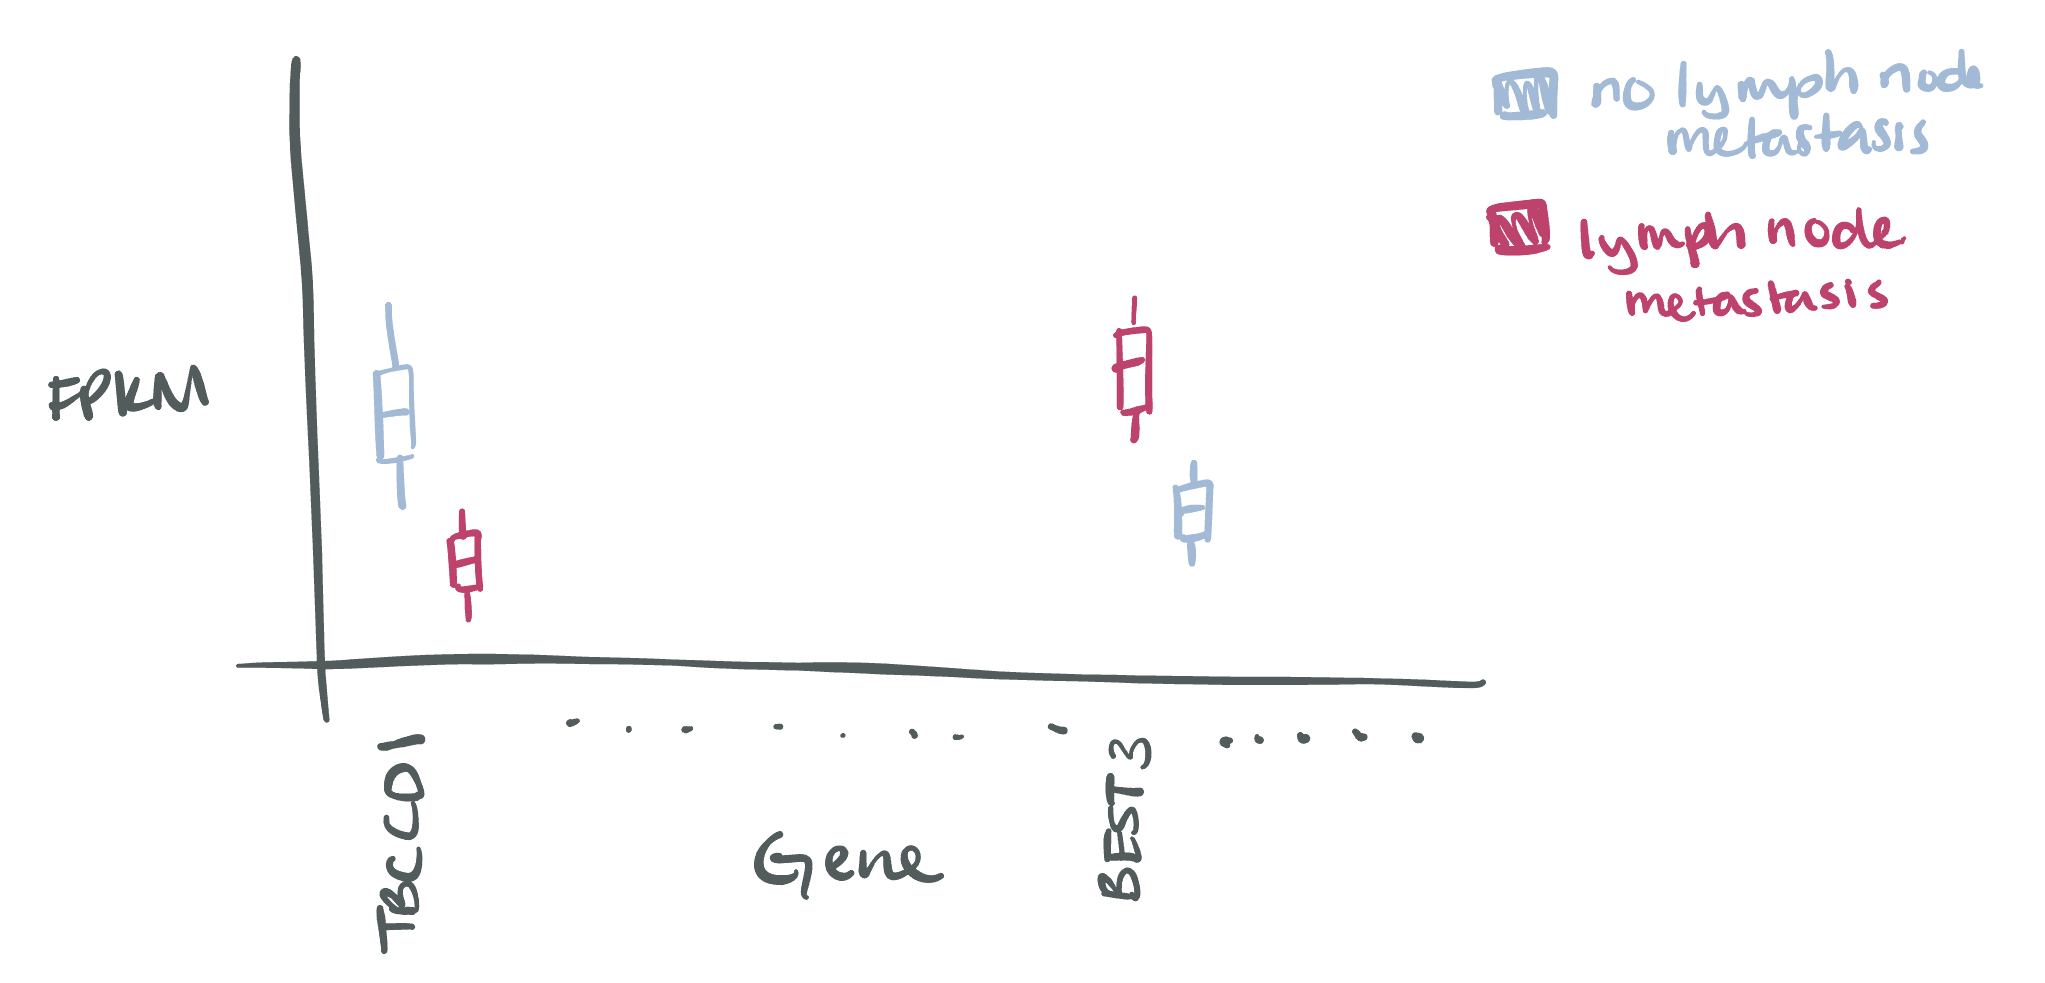

Afterwards, you could then make the box plot as shown above to compare the average gene expression levels in for each gene of samples with lymph node metastasis to the normal samples. This would allow you to determine which genes may be significantly upregulated in patients with lymph node metastasis.

***NOTE:*** No points were taken off from Project Part 2. However, comments were made on whether or not I would compare 20,000 genes or select only a select few samples for the additional research question and if so, how would I select them. To address this, I added more specific details including performing further analysis and creating an additional dataframe that could be used to select the top 20 genes that are upregulated in breast cancer.

# 3. Data Cleaning and Exploration

#### *a. Load the data*

Underneath the data availability statement, it states that the data is available in the GEO repository with an accession number of [GSE183947](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE183947). I clicked on the ftp link in the website and downloaded the GSE183947_fpkm.csv.gz file and saved the file to my downloads folder.

I then unzipped it by performing the following commands in my terminal:

``` bash
cd Downloads
gunzip *gz
```

This unzipped the .gz into the .csv file, a comma delimited file. I then saved this file to my Google Drive in a folder called "ds4bio". The files were also uploaded onto the GitHub.

In [ ]:
# import necessary packages
import pandas as pd
import seaborn as sns

In [ ]:
# read in the data using pandas read_csv function since it is a csv file
FPKM = pd.read_csv("drive/MyDrive/ds4bio/GSE183947_fpkm.csv", index_col=0)
FPKM.head()

CA.102548  CA.104338  CA.105094  CA.109745  CA.1906415  CA.1912627  \
TSPAN6         0.93       1.97       0.00       5.45        4.52        4.75   
TNMD           0.00       0.00       0.00       0.00        0.00        0.00   
DPM1           0.00       0.43       0.00       3.43        8.45        8.53   
SCYL3          5.78       5.17       8.76       4.58        7.20        6.03   
C1orf112       2.83       6.26       3.37       6.24        5.16       13.69   

          CA.1924346  CA.1926760  CA.1927842  CA.1933414  ...  CAP.2040686  \
TSPAN6          3.96        3.58        6.41       11.89  ...         6.66   
TNMD            0.00        0.23        0.39        0.44  ...         0.12   
DPM1            7.80        7.62        6.40        6.09  ...         4.93   
SCYL3           9.05        5.37        5.92       12.45  ...         8.02   
C1orf112        6.69        5.28        7.65       13.71  ...         7.91   

          CAP.2046297  CAP.2046641  CAP.348981  CAP.354300  CAP.359448  \
TSPAN6           8.35         8.94        6.33        5.94        6.35   
TNMD             0.17         1.08        0.29        0.00        0.07   
DPM1             7.47         5.72        4.96        9.28        9.15   
SCYL3            6.00         5.28        4.98        4.45        7.00   
C1orf112         4.61         8.35        9.84        7.68        5.62   

          CAP.94377  CAP.98389  CAP.98475  CAP.99145  
TSPAN6         3.74       4.84      10.46       4.54  
TNMD           9.19       1.18       0.09       0.39  
DPM1           4.77       3.75       7.31       2.77  
SCYL3          4.14       5.51       7.45       2.33  
C1orf112       2.81       7.08       7.28       5.39  

[5 rows x 60 columns]


***NOTE:*** I was unable to download Table 1 containing the clinical characteristics of the patients and instead copied and pasted the data into an .xlsx sheet and saved it as a .csv file, a comma delimited file. This file has also been uploaded onto [GitHub](https://github.com/kthuang20/ds4bio_project.git).

In [ ]:
# import clinical characteristics of each patient
patient_data = pd.read_csv("drive/MyDrive/ds4bio/patient_data.csv", index_col=0)
patient_data

Gender  Age at diagnosis Tumor size (cm) Pathological grade  \
Patient ID                                                               
102548          F               NaN             2*1                 II   
104338          F               NaN             NaN                 II   
105094          F               NaN             1*3                NaN   
109745          F               NaN       2.5*2.5*2                III   
1906415         F              49.0         1.3*1.7                  Ⅱ   
1912627         F              65.0     3.7*2.7*2.3                  Ⅱ   
1924346         F              46.0           2*1.3                  Ⅲ   
1926760         F              37.0         4.8*2.1                III   
1927842         F              36.0     3.6*1.3*1.5                  Ⅲ   
1933414         F              40.0     2.9*1.5*1.8                  Ⅲ   
1940640         F              66.0         3.1*1.2                  Ⅱ   
2004407         F              64.0       3*2.5*1.5                III   
2005288         F              46.0       2.5*1.8*2                  Ⅲ   
2006047         F              60.0         2.8*1.9                  Ⅲ   
2008260         F              59.0           2*1.9                  Ⅲ   
2009329         F              37.0         2.2*1.8                  Ⅲ   
2009381         F              47.0               2                NaN   
2009850         F              49.0         2.6*2.4                  Ⅲ   
2017611         F              57.0         1.7*1.2                  Ⅱ   
2039179         F              42.0         2.3*1.7                  Ⅲ   
2040686         F              40.0         1.7*1*1                  Ⅱ   
2045012         F              40.0         1.9*1.1                  Ⅲ   
2046297         F              37.0       5.5*5*1.2                  Ⅱ   
348981          F              56.0           8*6*2                Ⅱ-Ⅲ   
354300          F              43.0       2.5*2.5*2                NaN   
359448          F              30.0             1.5                NaN   
94377           F               NaN             2*2                 II   
98389           F               NaN               2                 II   
98475           F               NaN         7.5*2*2                NaN   
99145           F               NaN         0.7*0.9                 II   

           Lymph node Relapse  
Patient ID                     
102548            yes      no  
104338            yes      no  
105094            yes      no  
109745             no      no  
1906415            no     yes  
1912627           yes      no  
1924346            no      no  
1926760            no      no  
1927842           yes     yes  
1933414            no      no  
1940640           yes      no  
2004407            no      no  
2005288            no      no  
2006047           yes      no  
2008260            no      no  
2009329           yes     NaN  
2009381            no      no  
2009850           yes      no  
2017611           yes      no  
2039179           yes      no  
2040686            no      no  
2045012            no      no  
2046297           yes      no  
348981            yes      no  
354300             no      no  
359448             no      no  
94377             yes     yes  
98389              no      no  
98475              no      no  
99145             yes      no

#### *b. Clean the data*

I wanted to add 2 columns (as boolean series) containing relevant information about patient and samples so that all information is in one dataframe. This makes it easier for downstream analysis. One column will be called 'normal tissue' which states whether the sample is a normal tissue or cancerous tissue sample. The other will be called 'lymph node' which states whether each sample contains a lymph node metastasis. To do this, I:
1. Looked at each sample ids in the FPKM dataset
2. For each sample id, I separated the letters from the numbers (patient id)
3. Samples with letters 'CA' are classifed as yes normal samples and samples with 'CAP' are classified as not normal samples samples
4. Referring to the patient data, I determine whether the sample has lymph node metastasis and add this information to the 'lymph node' column

In [ ]:
# create a function to classify whether the sample is a cancerous tissue sample and has lymph node metastasis
def classify(sample):
  # separate the sample ID into letters and patient id
  info = sample.split('.')

  # if letters are 'CA,'
  if (info[0] == 'CA'):
    # it is a normal tissue sample
    is_normal = 'normal'
  # otherwise,
  else:
    # it is a cancerous sample
    is_normal = 'cancerous'

  # obtain the patient id
  patient_id = int(info[1])

  # identify whether patient has lymph node metastasis
  has_lymph_node = (patient_data.loc[patient_id, 'Lymph node'] == 'yes')

  return is_normal, has_lymph_node

In [ ]:
# create a dataframe containing whether each sample is a normal tissue sample and has lymph node metastasis
sample_info = FPKM.columns.to_series().apply(classify).apply(pd.Series)

# rename the column names
sample_info.rename(columns={0: 'tissue type', 1 : 'lymph node'}, inplace=True)
sample_info.head()

KeyError: ignored

In [ ]:
# show the sample IDs in the FPKM data
FPKM.columns.values

array(['CA.102548', 'CA.104338', 'CA.105094', 'CA.109745', 'CA.1906415',
       'CA.1912627', 'CA.1924346', 'CA.1926760', 'CA.1927842',
       'CA.1933414', 'CA.1940640', 'CA.2004407', 'CA.2005288',
       'CA.2006047', 'CA.2008260', 'CA.2009329', 'CA.2009381',
       'CA.2009850', 'CA.2017611', 'CA.2039179', 'CA.2040686',
       'CA.2045012', 'CA.2046297', 'CA.348981', 'CA.354300', 'CA.359448',
       'CA.94377', 'CA.98389', 'CA.98475', 'CA.99145', 'CAP.102548',
       'CAP.104338', 'CAP.105094', 'CAP.109745', 'CAP.1906415',
       'CAP.1912627', 'CAP.1924346', 'CAP.1926760', 'CAP.1927842',
       'CAP.1933414', 'CAP.1940640', 'CAP.2004407', 'CAP.2005288',
       'CAP.2006047', 'CAP.2008260', 'CAP.2009329', 'CAP.2009381',
       'CAP.2009850', 'CAP.2017611', 'CAP.2039179', 'CAP.2040686',
       'CAP.2046297', 'CAP.2046641', 'CAP.348981', 'CAP.354300',
       'CAP.359448', 'CAP.94377', 'CAP.98389', 'CAP.98475', 'CAP.99145'],
      dtype=object)

In [ ]:
# show the patient IDs
patient_data.index.values

array([ 102548,  104338,  105094,  109745, 1906415, 1912627, 1924346,
       1926760, 1927842, 1933414, 1940640, 2004407, 2005288, 2006047,
       2008260, 2009329, 2009381, 2009850, 2017611, 2039179, 2040686,
       2045012, 2046297,  348981,  354300,  359448,   94377,   98389,
         98475,   99145])

Comparing sample IDs and patient IDs, it seems like 'CAP.2046297' and 'CAP.2046641' have been mislabelled and should be renamed as 'CAP.2045012' and 'CAP.2046297.' This was done using pandas dataframe's [rename function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

In [ ]:
# rename the 2 of the column names
FPKM.rename(columns={'CAP.2046297': 'CAP.2045012', 'CAP.2046641': 'CAP.2046297'}, inplace=True)

In [ ]:
### rerunning previous step
# create a dataframe containing whether each sample is a normal tissue sample and has lymph node metastasis
sample_info = FPKM.columns.to_series().apply(classify).apply(pd.Series)

# rename the column names
sample_info.rename(columns={0: 'tissue type', 1 : 'lymph node'}, inplace=True)
sample_info.head()

tissue type  lymph node
CA.102548       normal        True
CA.104338       normal        True
CA.105094       normal        True
CA.109745       normal       False
CA.1906415      normal       False

In [ ]:
# have the observations as the rows and features as the columns
# and add sample information to FPKM table as additional features
sample_data = pd.concat([FPKM.transpose(), sample_info], axis=1)
sample_data.head()

TSPAN6  TNMD  DPM1  SCYL3  C1orf112    FGR   CFH  FUCA2   GCLC  \
CA.102548     0.93   0.0  0.00   5.78      2.83   4.80  1.37  21.92  34.16   
CA.104338     1.97   0.0  0.43   5.17      6.26   1.83  1.78  10.48  25.12   
CA.105094     0.00   0.0  0.00   8.76      3.37   0.00  0.00   0.00  21.77   
CA.109745     5.45   0.0  3.43   4.58      6.24   4.23  2.59  23.78  16.48   
CA.1906415    4.52   0.0  8.45   7.20      5.16  15.87  9.21  14.95  18.19   

             NFYA  ...  RP11-986E7.7  RP11-761B3.1  ZBTB8B  RP11-1084J3.4  \
CA.102548    0.70  ...          0.00          0.00   38.27           0.00   
CA.104338    1.13  ...          0.10          0.03   30.99           0.16   
CA.105094    0.00  ...          0.00          0.00   47.57           0.00   
CA.109745   10.72  ...          1.15          0.00   12.27           0.00   
CA.1906415  17.50  ...          0.00          0.00    4.69           0.00   

            RP11-944L7.5  FLJ00388  RP11-474G23.1  AC005358.1  tissue type  \
CA.102548            0.0      0.00           0.00         0.0       normal   
CA.104338            0.0      0.00           0.00         0.0       normal   
CA.105094            0.0      0.00           0.00         0.0       normal   
CA.109745            0.0      0.83           0.10         0.0       normal   
CA.1906415           0.0      0.00           0.64         0.0       normal   

            lymph node  
CA.102548         True  
CA.104338         True  
CA.105094         True  
CA.109745        False  
CA.1906415       False  

[5 rows x 20248 columns]

In [ ]:
# add another column to this dataframe that contains a boolean series as to whether it is a cancerous tissue sample
sample_data['is cancerous'] = sample_data['tissue type'] == 'cancerous'
sample_data.head()

TSPAN6  TNMD  DPM1  SCYL3  C1orf112    FGR   CFH  FUCA2   GCLC  \
CA.102548     0.93   0.0  0.00   5.78      2.83   4.80  1.37  21.92  34.16   
CA.104338     1.97   0.0  0.43   5.17      6.26   1.83  1.78  10.48  25.12   
CA.105094     0.00   0.0  0.00   8.76      3.37   0.00  0.00   0.00  21.77   
CA.109745     5.45   0.0  3.43   4.58      6.24   4.23  2.59  23.78  16.48   
CA.1906415    4.52   0.0  8.45   7.20      5.16  15.87  9.21  14.95  18.19   

             NFYA  ...  RP11-761B3.1  ZBTB8B  RP11-1084J3.4  RP11-944L7.5  \
CA.102548    0.70  ...          0.00   38.27           0.00           0.0   
CA.104338    1.13  ...          0.03   30.99           0.16           0.0   
CA.105094    0.00  ...          0.00   47.57           0.00           0.0   
CA.109745   10.72  ...          0.00   12.27           0.00           0.0   
CA.1906415  17.50  ...          0.00    4.69           0.00           0.0   

            FLJ00388  RP11-474G23.1  AC005358.1  tissue type  lymph node  \
CA.102548       0.00           0.00         0.0       normal        True   
CA.104338       0.00           0.00         0.0       normal        True   
CA.105094       0.00           0.00         0.0       normal        True   
CA.109745       0.83           0.10         0.0       normal       False   
CA.1906415      0.00           0.64         0.0       normal       False   

            is cancerous  
CA.102548          False  
CA.104338          False  
CA.105094          False  
CA.109745          False  
CA.1906415         False  

[5 rows x 20249 columns]

#### *c. Describe the data numerically*

In [ ]:
# print the number of rows and columns in the patient data table
patient_data.shape

(30, 6)

The data table containing patient characteristics contains 30 observations, each of one person the researchers took a normal surrounding tissue and cancerous tissue from. There are 6 features describing:
* each patient's gender
* age at diagnosis (if available)
* size of tumor in cm
* shape of cells
* whether or not they have a lymph node
* whether or not they have undergone relapse

In [ ]:
# obtain the number of rows and columns in FPKM dataframe
FPKM.shape

(20246, 60)

The gene expression dataset contains 20,246 rows and 60 columns. The columns represent each of the tissue samples. The column names are the IDs from each of the triple-negative breast cancer patients (Table 1). Normal surrounding breast tissue samples have CA in front of the patient ID while cancerous tissues have a CAP in front of it.
The reads from the RNA sequencing data were converted into their respective mRNA expression levels using using RSEM (RNA-Seq by Expectation Maximization). These were then normalized to Fragments Per Kilobase Per Million (FPKM) so that the gene expression levels are on the same scale making it easier to compare to each other. Therefore, the features are the FPKM for each gene.

In [ ]:
# look at the expression levels for MYH11 gene for all normal tissues
sample_data.loc['CA.102548':'CA.99145', 'MYH11']

CA.102548      9.04
CA.104338      9.59
CA.105094      7.79
CA.109745     19.25
CA.1906415    15.57
CA.1912627    19.18
CA.1924346    15.25
CA.1926760    36.08
CA.1927842    15.58
CA.1933414    14.99
CA.1940640    20.50
CA.2004407    11.51
CA.2005288    15.59
CA.2006047    13.11
CA.2008260    12.35
CA.2009329    14.04
CA.2009381    65.25
CA.2009850     6.06
CA.2017611    13.64
CA.2039179    27.24
CA.2040686    27.10
CA.2045012    13.13
CA.2046297    37.29
CA.348981     16.97
CA.354300     12.55
CA.359448     24.24
CA.94377       5.61
CA.98389      25.73
CA.98475      13.51
CA.99145      24.53
Name: MYH11, dtype: float64

In [ ]:
# look at the expression levels for MYH11 gene for all cancerous tissues
sample_data.loc['CAP.102548':'CAP.99145', 'MYH11']

CAP.102548      22.04
CAP.104338      43.91
CAP.105094     203.49
CAP.109745      63.39
CAP.1906415    341.05
CAP.1912627     12.86
CAP.1924346    365.61
CAP.1926760     88.62
CAP.1927842     22.08
CAP.1933414    651.65
CAP.1940640     18.46
CAP.2004407    334.90
CAP.2005288    264.76
CAP.2006047     14.12
CAP.2008260     42.88
CAP.2009329    115.47
CAP.2009381     67.09
CAP.2009850    135.01
CAP.2017611     78.78
CAP.2039179     80.68
CAP.2040686     81.52
CAP.2045012    318.19
CAP.2046297     78.70
CAP.348981      25.44
CAP.354300     149.02
CAP.359448      76.18
CAP.94377       72.03
CAP.98389       98.90
CAP.98475      513.23
CAP.99145      120.14
Name: MYH11, dtype: float64

I chose to compare the expression levels for MYH11 because when the.researchers performed a heat map (as shown in section 2B), MYH11 was one was one gene that showed to have a significantly higher expression in the cancerous samples compared to the normal samples. This suggests that higher expression levels for this gene may contribute to breast cancer. If this is true, I would expect that the performing a statistical summary would also indicate that MYH11 is upregulated in cancerous samples.

Because these are numeric values, the describe function will show the counts (number of observations), mean, min and max values, standard devation (std), 25%, median, and 75% quartiles of each dataset. For the counts, it will output 30 observations each for the normal and cancerous tissuess since there are 30 patients. The min and max values expression levels for MYH11 for cancerous samples are 150.00 and 651.65 respectively as those are the smallest and largest values in dataset. I would expect the mean to be close to 50 as most numbers are above 13 and the largest values will skew the mean upwards. Similarly, I would expect average FPKM levels of MYH11 for normal tissue samples to be the 100s as many samples have a FPKM above 100. The min and max FPKM values are 5.61 and 65.25 respectively as they are the smallest and largest values in the dataset.

In [ ]:
# summarize the expression levels for MYH11 gene based on whether they are normal tissue samples
sample_data.groupby('tissue type')['MYH11'].describe()

count        mean         std    min    25%    50%       75%  \
tissue type                                                                 
cancerous     30.0  150.006667  158.101057  12.86  48.78  81.10  189.8725   
normal        30.0   18.742333   11.783321   5.61  12.69  15.41   23.3050   

                max  
tissue type          
cancerous    651.65  
normal        65.25

The counts, min, and max values are the same as those predicted. The means are similar to the predicted means.

In [ ]:
# look at the expression levels for FOXM1 gene for all normal tissues
sample_data.loc['CA.102548':'CA.99145', 'FOXM1']

CA.102548     59.08
CA.104338     50.25
CA.105094     66.96
CA.109745     55.62
CA.1906415    13.52
CA.1912627    86.11
CA.1924346    13.16
CA.1926760    43.25
CA.1927842    96.46
CA.1933414    34.18
CA.1940640    32.74
CA.2004407    13.14
CA.2005288    64.21
CA.2006047    37.64
CA.2008260    50.14
CA.2009329    34.92
CA.2009381    33.22
CA.2009850    51.71
CA.2017611    34.82
CA.2039179    11.94
CA.2040686    24.18
CA.2045012    44.48
CA.2046297    12.64
CA.348981     24.04
CA.354300     20.20
CA.359448     26.16
CA.94377      36.65
CA.98389      62.81
CA.98475      69.33
CA.99145      31.00
Name: FOXM1, dtype: float64

In [ ]:
# look at the expression levels for FOXM1 gene for all cancerous tissues
sample_data.loc['CAP.102548':'CAP.99145', 'FOXM1']

CAP.102548     45.42
CAP.104338      8.56
CAP.105094     12.03
CAP.109745     14.74
CAP.1906415    14.06
CAP.1912627     0.00
CAP.1924346    14.84
CAP.1926760     9.85
CAP.1927842    20.77
CAP.1933414     6.34
CAP.1940640    19.64
CAP.2004407     8.63
CAP.2005288    10.69
CAP.2006047     0.00
CAP.2008260    18.15
CAP.2009329     9.68
CAP.2009381    10.55
CAP.2009850     6.23
CAP.2017611    25.96
CAP.2039179    11.87
CAP.2040686    17.64
CAP.2045012     8.25
CAP.2046297    12.84
CAP.348981     12.42
CAP.354300      8.63
CAP.359448      7.51
CAP.94377       9.33
CAP.98389      18.48
CAP.98475      18.94
CAP.99145      16.64
Name: FOXM1, dtype: float64

Because both datasets are numeric values, the describe function will print out the counts, min and max values, mean, 25%, median, and 75% quartiles. Both the normal tissue and cancerous tissue datasets have 30 observations each, one sample from each patient. The min and max FPKM values among the normal tissue samples are 11.94 and 96.46 respectively as those are the smallest and largest values in the dataset. The min FPKM among the cancerous tissue samples is 0 while the max is 45.42. The average FPKM value for FOXM1 in normal tissue samples would be close to 40 because most of the samples have a FPKM value somewhere in the 20s to 60s. The average FPKM value for FOXM1 for cancerous tissue samples would be close to 13 because most of the data is from 6 to 20.

In [ ]:
# summarize the expression levels for FOXM1 gene based on whether they are normal tissue samples
sample_data.groupby('tissue type')['FOXM1'].describe()

count       mean        std    min     25%     50%      75%  \
tissue type                                                                
cancerous     30.0  13.289667   8.391799   0.00   8.630  11.950  17.3900   
normal        30.0  41.152000  21.973149  11.94  24.675  35.785  54.6425   

               max  
tissue type         
cancerous    45.42  
normal       96.46

The mean, min, and max values match the predicted values.

#### *d. Visualize the data*

To see if MYH11 is upregulated in cancerous tissue samples, I made a  box plot. This allows me to visualize the median and quartiles for the levels of MYH11. If majority of the cancerous samples have a higher expression for MYH11 and the median is higher, this may indicate that this gene could be signficantly upregulated in cancerous samples. This could mean that MYH11 may be a key gene involved in developing breast cancer.

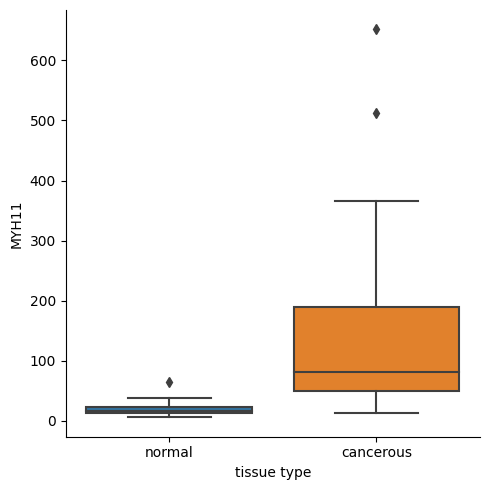

In [ ]:
# make a bar plot comparing the FPKM values for HMCN2 gene for normal and cancerous tissue samples
sns.catplot(
    data = sample_data,
    x = 'tissue type',
    y = 'MYH11',
    kind = 'box'
)

This box plot shows that the cancerous tissue samples had a greater 25%, median, and 75% quartile (most of the data) compared to the normal tissue samples for MYH11. These values match up with the values outputted from the describe function. The paper's research question was to understand if there are key genes involved in tumor progression. This box plot suggests that MYH11 may be signficantly upregulated in cancerous samples. Therefore, it could be possible that this gene is involved in developing breast cancer.

To compare the gene expression of FOXM1 between normal and cancerous tissue samples, I would make another box plot because it shows the median and quartiles. This helps to visualize where most of the data lies for each tissue type and if the median is greater in for one tissue type compared to the other.

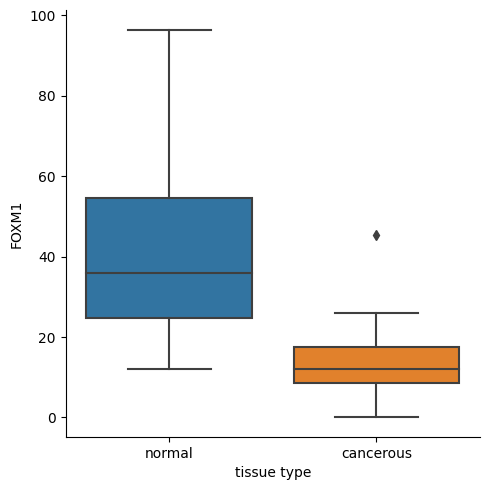

In [ ]:
# make a box plot comparing the FPKM values for FOXM1 gene for normal and cancerous tissue samples
sns.catplot(
    data = sample_data,
    x = 'tissue type',
    y = 'FOXM1',
    kind = 'box'
)

This box plot shows that the cancerous tissue samples had a greater 25%, median, and 75% quartile (most of the data) compared to the normal tissue samples for FOXM1. These values match up with the values outputted from the describe function. Overall, this box plot suggests that this gene may be downregulated in the progression of breast cancer as supported by the heat map presented in the first figure (normal tissue samples had more red boxes indicating higher expression levels for FOXM1).

***NOTE:*** From part 3, I received a comment regarding the output of the describe function for MYH11, why I chose that gene to analyze, and what I expected its relationship with cancer to be. To address this, I added an additional paragraph before the I performed the describe function to describe that based on the heat map that I saw from the paper, it showed that MYH11 was upregulated in cancerous samples. This suggests that higher expression levels for this gene could contribute to breast cancer. I also received a comment regarding how the box plot comparing MYH11 levels across the normal and cancerous samples connects to the research question. To address this, I reworded my explanations as to why I wanted to make a box plot to compare expression levels for MYH11 and what the results showed. In this explanation, I emphasized that if majority of the cancerous samples have a higher levels of MYH11, this may indicate that this gene is signficantly upregulated. Because the box plot showed that this was true, it may indicate that MYH11 could potentially be a key gene involved in developing breast cancer.

# 4. Model the Data

*a. Data Question 1:* Can we use FPKM levels of MYH11 to differentiate between triple-negative breast cancer and normal samples?



*Rationale for question:* As shown in the heatmap section 2b, triple-negative breast cancer patients do have higher expression levels for MYH11. This suggests that MYH11 could be a key gene for tumor progression (the paper's research question).

*Hypothesis:* The median is greater than normal tissue samples and majority of the cancerous tissue samples had greater FPKM levels compared to the normal tissues (see box plot from section 3d). Therefore, I would expect that expression levels for MYH11 could be used to differentiate between tissue sample types.

*Rationale:* This data set is appropriate to answer this question as it contains MYH11 levels of 60 tissue samples (observations), 30 cancerous and 30 normal tissue samples. Therefore, the two features being explored here are MYH11 levels and whether it is a normal or cancerous tissue. By comparing the gene expression levels of cancerous to normal tissue samples, you can see if HYM11 levels differs between the two groups.

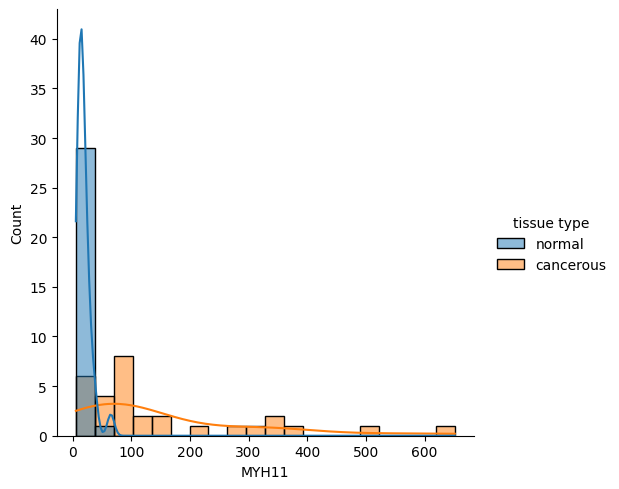

In [ ]:
# make a histogram showing the number of normal/cancerous samples for each range of expression levels for MYH11
sns.displot(data = sample_data,
            x = 'MYH11',
            hue = 'tissue type',
            kde = True)

The histogram above indicates that the MYH11 levels for the normal samples do exhibit a normal distribution. The second small peak is formed due to the outlier as determined from the box plot from section 3d. However, for the cancerous samples, it does not seem like the MYH11 levels fit a normal model very well as it has a much "fatter" tail and have a much wider curve.

Therefore, the following steps will be performed:
1. Create a normal model based off of the mean and standard deviations of the MYH11 levels for the normal tissue samples (see the numerical summary statistics of MYH11 from section 3b).
2. Generate the estimate MYH11 levels for a number of observations as in the data set
3. Compare the violin plots showing the distributions between the actual and model generated data and visually check that they are similar.
4. Calculate the probabiltiies of the MYH11 levels of cancerous samples from the data set in appearing in this normal model. They should have low probabiltiies, indicating that they are most likely not MYH11 FPKM levels from normal tissue samples.
5. Calculate the probabities of the normal tissue samples appearing in this model.
6. Compare the average log-likelihood of both datasets and check that for it is greater for the normal samples than for the cancerous samples.

In [ ]:
# import module used to create a normal model
from scipy.stats import norm

In [ ]:
# store the MYH11 levels of normal tissue samples
MYH11_norm_levels = sample_data.loc[~sample_data['is cancerous'], 'MYH11']

# store the MYH11 levels of cancerous tissue samples
MYH11_canc_levels = sample_data.loc[sample_data['is cancerous'], 'MYH11']

# create a normal model to model the MYH11 levels for normal tissue samples
MYH11_norm_model = norm(loc = MYH11_norm_levels.mean(), scale = MYH11_norm_levels.std())

# store the number of normal tissue samples as a variable
num_samples = len(MYH11_norm_levels)

# store generated FPKM levels for the same number of tissue samples as in the data set
model_MYH11_levels = MYH11_norm_model.rvs(size = num_samples)

In [ ]:
# show summary statistics again
MYH11_norm_levels.describe()

count    30.000000
mean     18.742333
std      11.783321
min       5.610000
25%      12.690000
50%      15.410000
75%      23.305000
max      65.250000
Name: MYH11, dtype: float64

The normal model uses a mean of about 19 and has a standard deviation of 12. The mean suggests that the normal samples have low expression for this gene. The standard deviation is almost half of the mean, suggesting that there is a lot of variability in the expression levels for this gene for normal samples.

In [ ]:
# create a dataframe containing the MYH11 levels and which data set it came from
MYH11_levels = pd.DataFrame({
    'sample type': ['model']*num_samples + ['normal']*num_samples + ['cancerous']*num_samples,
    'MYH11': pd.concat([pd.Series(model_MYH11_levels), MYH11_norm_levels, MYH11_canc_levels])
    })

MYH11_levels.head()

sample type      MYH11
0       model  27.811906
1       model  18.828305
2       model  21.741873
3       model   8.077658
4       model  20.547923

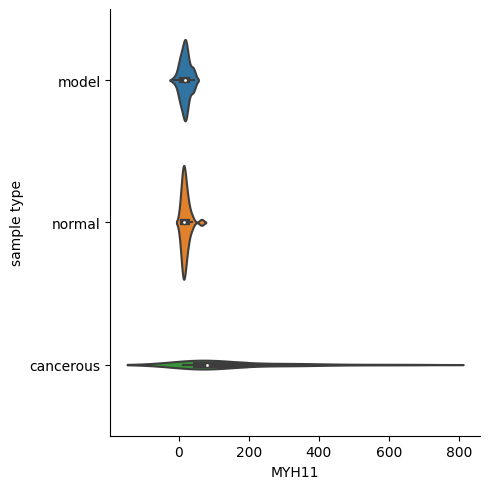

In [ ]:
# create a violin to visualize the differences in MYH11 levels across data sets
sns.catplot(
    data = MYH11_levels,
    y = 'sample type',
    x = 'MYH11',
    kind = 'violin'
)

Based on the histogram above, it seems like this normal model may be a good model as the median and mean are similar to each other. The distributions also look similar. However, the cancerous samples have a higher mean and median MYH11 levels, suggest that this model can act as a model to predict whether a sample is normal or cancerous based on MYH11 expression levels. Its distribution also looks completely different compared to the normal samples and model generated samples. To quantitatively verify this, I will compare the average log likelihoods of each data set occurring in this model. In other words, how likely are each of the samples in each data set to have have a normal MYH11 level? Because the normal samples have been classified as normal, they should have a high average likelihood as this model is meant to represent normal samples. Because the cancerous samples have been classified as cancerous, they should have much higher MYH11 levels and therefore should have little likelihood of appearing in this mode.

In [ ]:
# store the probabilties of the MYH11 levels normal tissue samples occurring in this model
norm_probs = MYH11_norm_model.pdf(MYH11_norm_levels)

# store the probabilties of the model generated MYH11 levels occurring in this model
model_probs = MYH11_norm_model.pdf(model_MYH11_levels)

# store the probabilties of the MYH11 levels cancerous tissue samples occurring in this model
canc_probs = MYH11_norm_model.pdf(MYH11_canc_levels)

# show probabilities of cancerous samples
canc_probs

array([3.25563099e-002, 3.45961339e-003, 1.41207197e-055, 2.58268102e-005,
       1.16013497e-164, 2.98900950e-002, 2.29778311e-190, 7.81841835e-010,
       3.25252082e-002, 0.00000000e+000, 3.38468061e-002, 1.60471826e-158,
       7.46300593e-097, 3.13492649e-002, 4.15385424e-003, 7.89009121e-017,
       7.48079049e-006, 2.44395309e-023, 7.80553254e-008, 3.38809465e-008,
       2.32335863e-008, 1.96443772e-142, 8.08008143e-008, 2.88062134e-002,
       9.68505942e-029, 2.34468553e-007, 1.22667331e-006, 3.02664826e-012,
       0.00000000e+000, 2.81875827e-018])

Notice that all of these probabilites are incredibly low. This suggests that MHY11 levels for these samples are not within the normal range.

In [ ]:
# import numpy package
import numpy as np

# create a dataframe showing the sum log likelihoods each data set occuring in this model
avg_likelihood = pd.DataFrame({
    'model': np.log(model_probs).mean(),
    'normal': np.log(norm_probs).mean(),
    'cancerous': np.log(canc_probs).mean()
}, index = ['tissue type'])

avg_likelihood

<ipython-input-36-66487101f529>:8: RuntimeWarning: divide by zero encountered in log
  'cancerous': np.log(canc_probs).mean()


model    normal  cancerous
tissue type -3.994049 -3.868957       -inf

This can also verified by comparing the the average log likelihood values and the normal samples and model generated MYH11 levels had similar values while MYH11 levels of the cancerous samples on average are not likely to occur in this model. Therefore, it does seem that this model could predict whether a patient could be cancerous or normal based on their MYH11 levels.

*b. Data Question 2:* Of the top most upregulated gene in cancerous samples, do lymph node metastasis samples exhibit greater FPKM levels compared to normal samples?

*Rationale for question:* My research question was looking at if we can identify key genes that could be used to differentiate between normal samples and samples with lymph node metastasis. This tests this by comparing if the mean expression levels for the top upregulated gene is greater for samples with lymph node metastasis compared to normal samples. If the mean expression levels are greater, this could indicate that this could be a key gene in progressing tumors.

*Hypothesis:* If the overall gene expression levels are involved in developing breast cancer, then I would expect that because lymph node metastasis is the progression of this, patients would have overall higher levels compared to patients who do not.

To answer the question, I first need to determine the top upregulated gene in the cancerous samples. Here is a summary of the steps:
1. Calculate the average FPKM levels of each gene across all normal samples.
2. Calculate the average FPKM levels of each gene across all cancerous samples.
3. Take the difference between the average FPKM levels between cancerous and normal samples.
4. Sort the genes from the greatest to smallest difference and select the genes with the greatest difference in FPKM levels.



In [ ]:
# subset only the relevant data for the normal samples for analysis
norm_samples = sample_data[~sample_data['is cancerous']].drop(['tissue type', 'lymph node', 'is cancerous'], axis=1)

# get the mean FPKM levels across all normal samples for each gene
mean_FPKM_norm = norm_samples.mean()
mean_FPKM_norm

TSPAN6           6.044000
TNMD             0.221000
DPM1             7.030333
SCYL3            7.668667
C1orf112         9.465667
                   ...   
RP11-1084J3.4    0.243000
RP11-944L7.5     0.000000
FLJ00388         0.089000
RP11-474G23.1    0.261667
AC005358.1       0.029333
Length: 20246, dtype: float64

In [ ]:
# subset only the relevant data for the cancerous samples for analysis
canc_samples = sample_data[sample_data['is cancerous']].drop(['tissue type', 'is cancerous'], axis=1)

# get the mean FPKM levels across all cancerous samples for each gene
mean_FPKM_canc = canc_samples.drop('lymph node', axis=1).mean()
mean_FPKM_canc

TSPAN6           8.104333
TNMD             1.323333
DPM1             5.494333
SCYL3            5.409667
C1orf112         7.967333
                   ...   
RP11-1084J3.4    0.204333
RP11-944L7.5     0.000000
FLJ00388         0.291667
RP11-474G23.1    0.314000
AC005358.1       1.257667
Length: 20246, dtype: float64

In [ ]:
# store the difference in mean FPKM levels for each gene
diff_FPKM = mean_FPKM_canc - mean_FPKM_norm

# show the top 20 upregulated genes
diff_FPKM.sort_values(ascending=False).head(20)

NPIPA7        2906.312333
NEDD4         2440.480667
DCAF8         1730.340500
CLN3          1632.896333
CRIP1         1345.793333
IDS           1245.535667
AQP1          1190.357500
BLOC1S6       1151.998333
KIAA1328      1044.974000
NDUFA7         996.085167
TRIM22         928.746000
LSP1           813.603167
TMEM182        799.277000
CFB            726.745500
POLR2J2        723.578500
TBC1D8B        704.688667
UQCR11         681.933667
AL590867.1     655.142333
HBA1           637.089000
KRT1           634.926333
dtype: float64

In [ ]:
# store the name of the top upregulated gene in breast cancer samples
top_gene = 'NPIPA7'

Now that I have found the top gene, I want to compare the FPKM levels for that gene across normal and lymph node metastasis. Therefore, there are 2 features being used to answer this question. A total of 45 samples are used, 15 lymph node metastasis samples and 30 normal samples. To do this, I will:
1. Store the FPKM levels of all samples with lymph node metastasis for the top upregulated gene.
2. Store the FPKM levels of all samples without lymph node metastasis for the top upregulated gene.
3. Create a dataframe with the rows as each sample. It will have one column indicating what type of sample and another column of the FPKM level for the upregulated gene for that sample.
4. Show a violin plot summarizing the FPKM levels for the top upregulated gene across sample type.

In [ ]:
# store the FPKM levels for the top upregulated gene of samples with lymph node metastasis
has_metastasis = canc_samples.loc[canc_samples['lymph node'], top_gene]

# store the FPKM levels for the top upregulated gene of normal samples
no_metastasis = sample_data.loc[~sample_data['is cancerous'], top_gene]

# create a dataframe with sample type and the FPKM level for the gene
comparing_metastasis = pd.DataFrame({
    'sample type': ['normal']*len(no_metastasis) + ['lymph node metastasis']*len(has_metastasis),
    top_gene: pd.concat([no_metastasis, has_metastasis])
})

comparing_metastasis.head()

sample type      NPIPA7
CA.102548       normal   46.950000
CA.104338       normal  101.130000
CA.105094       normal  118.713333
CA.109745       normal  260.923333
CA.1906415      normal  377.493333

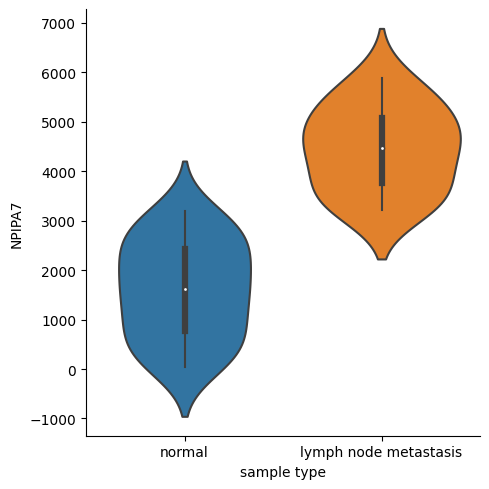

In [ ]:
# create a violin plot comparing the FPKM levels for samples that did/did not have lymph node metastasis
sns.catplot(data = comparing_metastasis,
            x = 'sample type',
            y = 'NPIPA7',
            kind = 'violin')

In [ ]:
# show the summary statistics
comparing_metastasis.groupby(by='sample type').describe()

NPIPA7                                                 \
                       count         mean         std      min          25%   
sample type                                                                   
lymph node metastasis   15.0  4440.905778  858.160966  3224.65  3768.628333   
normal                  30.0  1601.625556  990.145578    46.95   768.985000   

                                                              
                               50%          75%          max  
sample type                                                   
lymph node metastasis  4465.943333  5076.686666  5888.643333  
normal                 1625.843333  2435.023333  3202.566667

Based on this violin plot, it seems like both could potentially be modelled using a normal distribution. I also see that the median FPKM levels for NPIPA7 of samples with lymph node metastasis is higher than for normal samples. This suggests to me that patients with lymph node metastasis will higher expression levels for this gene. Because the FPKM levels both types of samples exhibit a normal distribution, I can create a linear model to model the average FPKM levels for each type of sample. Based on the violin plot, I expect that lymph node metastasis samples will have a higher mean expression of NPIPA7 compared to normal samples. If this is true, then this could indicate that NPIPA7 is one gene that could lead to tumor progression.

To do this, I will:
1. Add a column that converts the type of sample to numerical values where 0 = normal sample and 1 = lymph node metastasis.
2. Add a constant column (used to calculate the y-intercept).
3. Convert the data into inputs into the linear model where X = type of sample and y = FPKM level of top upregulated gene.
4. Fit a linear model using a slope and y-intercept calculated using least squares (minimizes the distance from the points to the best fit line).

In [ ]:
# import the stats model
import statsmodels.api as sm

# add boolean series as a column in the dataframe as to whether it is a lymph node metastasis sample
comparing_metastasis['lymph node metastasis'] = comparing_metastasis['sample type'] == 'lymph node metastasis'

# convert boolean series to integers where:
# 0 = no lymph node metastasis and
# 1 = lymph node metastasis
comparing_metastasis['lymph node metastasis'] = comparing_metastasis['lymph node metastasis'].astype(int)

# add a constant column
to_model = sm.add_constant(comparing_metastasis.drop('sample type', axis=1))
to_model.head(10)

const      NPIPA7  lymph node metastasis
CA.102548     1.0   46.950000                      0
CA.104338     1.0  101.130000                      0
CA.105094     1.0  118.713333                      0
CA.109745     1.0  260.923333                      0
CA.1906415    1.0  377.493333                      0
CA.1912627    1.0  536.206667                      0
CA.1924346    1.0  623.150000                      0
CA.1926760    1.0  741.916667                      0
CA.1927842    1.0  850.190000                      0
CA.1933414    1.0  970.880000                      0

In [ ]:
# convert data into inputs into linear model
# input = whether or not lymph node metastasis
# output = average gene expression
X = to_model.drop(top_gene, axis=1)
y = to_model[top_gene]

# fit the best linear model using ordinary least squares
metastasis_model = sm.OLS(y, X).fit()

# show summary of results of least squares
metastasis_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NPIPA7   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     89.48
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           4.54e-12
Time:                        13:43:52   Log-Likelihood:                -371.33
No. Observations:                  45   AIC:                             746.7
Df Residuals:                      43   BIC:                             750.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1601.6256    173.298      9.242      0.000    1252.137    1951.114
lymph node metastasis  2839.2802    300.161      9.459      0.000    2233.949    3444.612
==============================================================================
Omnibus:                        9.459   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                2.635
Skew:                          -0.013   Prob(JB):                        0.268
Kurtosis:                       1.815   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# show paramaters of the linear model
metastasis_model.params

const                    1601.625556
lymph node metastasis    2839.280222
dtype: float64

The linear model indicates that the normal samples have an average expression level of 1601 for the most upregulated gene. The slope indicates that the FPKM levels for cancerous tissue samples with lymph node metastasis for this gene was average of 2839 FPKM more.

In [ ]:
# use the linear model to predict the expression levels of all the samples
predicted_values = metastasis_model.predict(X)
predicted_values

CA.102548      1601.625556
CA.104338      1601.625556
CA.105094      1601.625556
CA.109745      1601.625556
CA.1906415     1601.625556
CA.1912627     1601.625556
CA.1924346     1601.625556
CA.1926760     1601.625556
CA.1927842     1601.625556
CA.1933414     1601.625556
CA.1940640     1601.625556
CA.2004407     1601.625556
CA.2005288     1601.625556
CA.2006047     1601.625556
CA.2008260     1601.625556
CA.2009329     1601.625556
CA.2009381     1601.625556
CA.2009850     1601.625556
CA.2017611     1601.625556
CA.2039179     1601.625556
CA.2040686     1601.625556
CA.2045012     1601.625556
CA.2046297     1601.625556
CA.348981      1601.625556
CA.354300      1601.625556
CA.359448      1601.625556
CA.94377       1601.625556
CA.98389       1601.625556
CA.98475       1601.625556
CA.99145       1601.625556
CAP.102548     4440.905778
CAP.104338     4440.905778
CAP.105094     4440.905778
CAP.1912627    4440.905778
CAP.1927842    4440.905778
CAP.1940640    4440.905778
CAP.2006047    4440.905778
C

Numerical results from the model indicate that breast cancerous samples with lymph node metastasis did exhibit a higher mean expression levels for the most upregulated gene in this data set compared to the normal samples. Additionally, the mean expression levels do match up with the mean values reported from the summary statistics, indicated that this model was able to predict the average expression levels based on sample type. The R-squared value indicates that the type of sample (normal of cancerous) explains 67.5% of the variance in the FPKM expression levels for NPIPA7.